In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [5]:
import jax
jax.config.update("jax_enable_x64", True)
import s2fft
import healpy as hp
import numpy as np
import s2wav
import s2wav.filters as filters
import matplotlib.pyplot as plt
%matplotlib inline 
# import jax.numpy as jnp

# Step 1: Read the Healpix map
healpix_map_path = '../data/planck_simulation/ffp10_newdust_total_030_full_map.fits'
healpix_map = hp.read_map(healpix_map_path)

# Step 2: Convert Healpix map to spherical harmonic coefficients
L_max = hp.npix2nside(len(healpix_map))*2  # Define maximum multipole moment 
alm = hp.map2alm(healpix_map, lmax=L_max-1)

# Step 3: Rearrange coefficients for s2wav
f = np.zeros((L_max, 2 * L_max - 1), dtype=np.complex128)

for l in range(L_max):
    for m in range(-l, l + 1):
        index = hp.Alm.getidx(L_max - 1, l, abs(m))
        if m < 0:
            f[l, L_max + m - 1] = (-1)**m * np.conj(alm[index])
        else:
            f[l, L_max + m - 1] = alm[index]

# # Step 4: Perform wavelet analysis
# N = 1  # Number of directional wavelets
# filter = filters.filters_directional_vectorised(L_max, N)

# # wavelet_coeffs, scaling_coeffs
# f_wav, f_scal = s2wav.analysis(f, L_max, N, filters=filter)

# # Step 5 Store the wavelet_coeffs, scaling_coeffs for future use
# # f_wav is a list of jaxlib.xla_extension.ArrayImpl objects

# # Convert each element in f_wav to a numpy array and save it
# for i, wav in enumerate(f_wav):
#     np_wav = np.array(wav)  # Convert JAX array to numpy array
#     np.save(f"convolution/30/f_wav_{i}", np_wav)  

# # Convert  f_scal to a numpy array and save it
# np_scal = np.array(f_scal)  # Convert JAX array to numpy array
# np.save(f"convolution/30/f_scal", np_scal)  

# Stored_f_wav = [np.load(f"/Users/maxwang/Documents/projects/CMB_plot/convolution/30/f_wav_{i}.npy", allow_pickle=True) for i in range(12)]
# Sotred_f_sacl = np.load("/Users/maxwang/Documents/projects/CMB_plot/convolution/30/f_scal.npy")
# Step 6: reconstruct the signal if needed


In [5]:
import jax
jax.config.update("jax_enable_x64", True)
import s2fft
import healpy as hp
import numpy as np
import s2wav
import s2wav.filters as filters
import matplotlib.pyplot as plt
%matplotlib inline 
# Read HEALPix data
healpix_data = hp.read_map('/Users/maxwang/Documents/projects/CMB_plot/data/planck_simulation/ffp10_newdust_total_030_full_map.fits')

# Define the grid size
n_theta = 180  # Adjust as needed
n_phi = 360    # Adjust as needed

# Create theta and phi arrays
theta = np.linspace(0, np.pi, n_theta)
phi = np.linspace(0, 2 * np.pi, n_phi)

# Create meshgrid
phi_grid, theta_grid = np.meshgrid(phi, theta)

# Convert to HEALPix indices
healpix_indices = hp.ang2pix(hp.get_nside(healpix_data), theta_grid, phi_grid)

# Map HEALPix data to regular grid
regular_grid_data = healpix_data[healpix_indices]

# Verify the shape
print(regular_grid_data.shape)  # Should be (n_theta, n_phi)


(180, 360)


In [9]:
hp.npix2nside(len(regular_grid_data))*2

ValueError: Wrong pixel number (it is not 12*nside**2)

In [7]:
L_max = hp.npix2nside(len(healpix_data))*2

N = 1  # Number of directional wavelets
filter = filters.filters_directional_vectorised(L_max, N)


s2wav.analysis(regular_grid_data, L_max, N, filters=filter)

ValueError: Incompatible shapes for broadcasting: (1, 180, 360) and requested shape (1, 2048, 4095)

In [6]:
s2fft.inverse(f, L_max)

: 

In [ ]:
s2fft.inverse()

In [4]:
hp.get_interp_val(healpix_map, 180, 360, lonlat=True)

0.0003624585806392127

The sphere is initially divided into 12 base pixels. These 12 base pixels cover the entire sphere.
Subdivisions within Each Base Pixel:
Each of the 12 base pixels is further subdivided into a finer grid.
Nside specifies how many subdivisions are made along one side of each base pixel.

Horizontal Subdivisions: 
𝑁side subdivisions along the horizontal direction of each base pixel.
Vertical Subdivisions: 
Nside subdivisions along the vertical direction of each base pixel.

In [3]:
print(hp.get_nside(healpix_map))
# healpix partitioning of the sphere surface into 12 equal sized pixels
# 12 equal sized pixels
# N_side is a parameter that defines the resolution of the HEALPix grid. 
# It determines the number of divisions along the side of each of the 12 base pixels on the sphere.

# N_pix = 12 * N_side^2
# N_pix = 12 * 1024^2

print(healpix_map.shape)



1024
(12582912,)


In [9]:
healpix_map[1]
# It is the variation between the real data and the mean?

-9.369848e-05

In [13]:
(L_max * (L_max + 1)) // 2

2098176

In [11]:
alm.shape # (L_max * (L_max + 1)) // 2 stored in 1 d for efficiency



(2098176,)

In [ ]:
l, m = 2l+1

In [10]:
f.shape

(2048, 4095)

In [ ]:
import healpy as hp
import numpy as np
import s2wav
import s2wav.filters as filters
import jax
import jax.numpy as jnp
jax.config.update("jax_enable_x64", True)

# Load the saved wavelet coefficients and scaling coefficients
L_max = 512  # This should match the bandlimit you used earlier
N = 1  # Number of directional wavelets

f_wav = [np.load(f"convolution/30/f_wav_{i}.npy", allow_pickle=True) for i in range(12)]
f_scal = np.load(f"convolution/30/f_scal.npy")

# Convert the numpy arrays back to JAX arrays
f_wav = [jax.device_put(wav) for wav in f_wav]
f_scal = jax.device_put(f_scal)

# Reconstruct the spherical harmonic coefficients from the wavelet coefficients
filter = filters.filters_directional_vectorised(L_max, N)
f_reconstructed = s2wav.synthesis(f_wav, f_scal, L_max, N, filters=filter)

# Prepare the reconstructed spherical harmonic coefficients for Healpix
alm_reconstructed = np.zeros(hp.Alm.getsize(L_max - 1), dtype=np.complex128)

for l in range(L_max):
    for m in range(-l, l + 1):
        index = hp.Alm.getidx(L_max - 1, l, abs(m))
        if m < 0:
            alm_reconstructed[index] = (-1)**m * np.conj(f_reconstructed[l, L_max + m - 1])
        else:
            alm_reconstructed[index] = f_reconstructed[l, L_max + m - 1]

# Convert the spherical harmonic coefficients back to a Healpix map
nside = hp.npix2nside(len(healpix_map))
healpix_map_reconstructed = hp.alm2map(alm_reconstructed, nside)

# Plot the reconstructed Healpix map
hp.mollview(healpix_map_reconstructed, title='Reconstructed Healpix Map', cmap='jet')
plt.show()


In [7]:
import healpy as hp
import numpy as np
import s2wav
import s2wav.filters as filters
import jax
import jax.numpy as jnp
jax.config.update("jax_enable_x64", True)
import matplotlib.pyplot as plt
%matplotlib inline 
healpix_map_path = 'data/planck_simulation/ffp10_newdust_total_030_full_map.fits'
healpix_map = hp.read_map(healpix_map_path)

f_reconstructed = np.load("/Users/maxwang/Documents/projects/CMB_plot/convolution/30/reconstructed_map.npy")


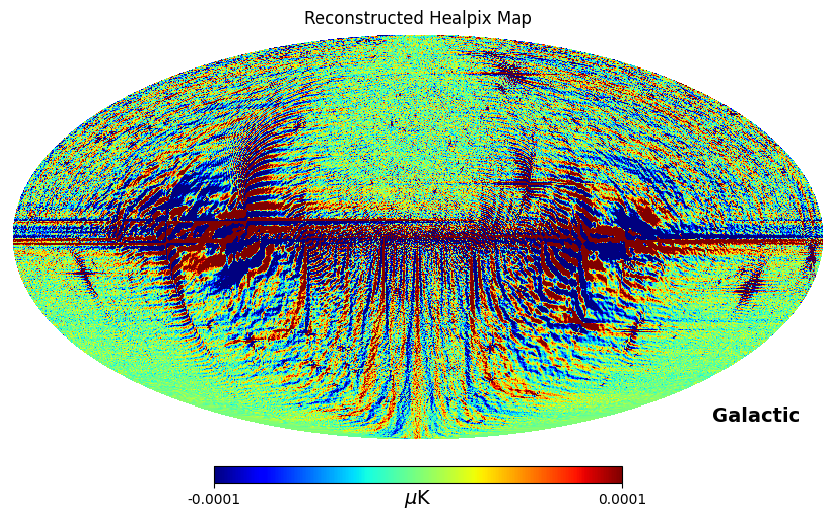

In [14]:
L_max = 2 * hp.npix2nside(len(healpix_map))

# Prepare the reconstructed spherical harmonic coefficients for Healpix
alm_reconstructed = np.zeros(hp.Alm.getsize(L_max - 1), dtype=np.complex128)

for l in range(L_max):
    for m in range(-l, l + 1):
        index = hp.Alm.getidx(L_max - 1, l, abs(m))
        if m < 0:
            alm_reconstructed[index] = (-1)**m * np.conj(f_reconstructed[l, L_max + m - 1])
        else:
            alm_reconstructed[index] = f_reconstructed[l, L_max + m - 1]

# Convert the spherical harmonic coefficients back to a Healpix map
nside = hp.npix2nside(len(healpix_map))
healpix_map_reconstructed = hp.alm2map(alm_reconstructed, nside)

# Plot the reconstructed Healpix map
hp.mollview(healpix_map_reconstructed,coord=["G"],unit=r"$\mu$K",
        # unit="K",
        # norm="hist",
        # min=-1*n,
        # max=1*n,
        min=-1*1e-4,  
        max=1*1e-4, title='Reconstructed Healpix Map')
plt.show()


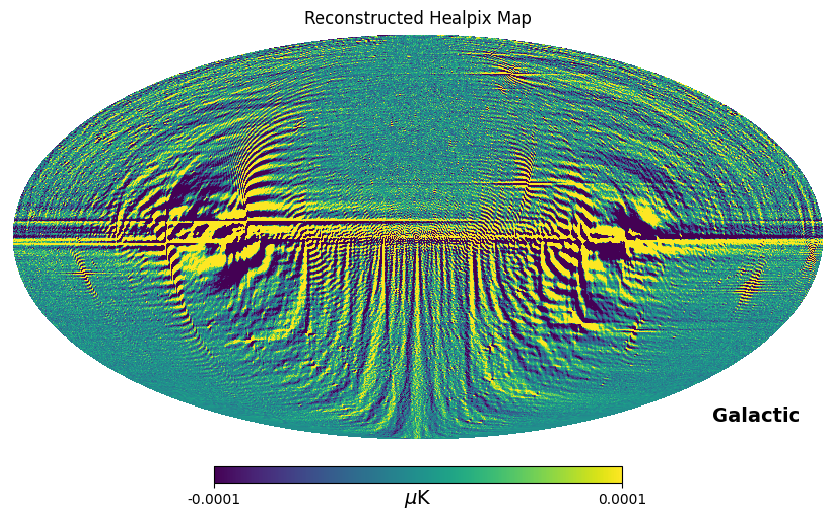

In [21]:
hp.mollview(healpix_map_reconstructed,coord=["G"],unit=r"$\mu$K",
        # unit="K",
        # norm="hist",
        # min=-1*n,
        # max=1*n,
        min=-1*1e-4,  
        max=1*1e-4, title='Reconstructed Healpix Map')
plt.show()


In [17]:
alm.shape

(2098176,)

In [10]:
for i in range(12):
    print(f_wav[i].shape)

(1, 4, 7)
(1, 4, 7)
(1, 8, 15)
(1, 16, 31)
(1, 32, 63)
(1, 64, 127)
(1, 128, 255)
(1, 256, 511)
(1, 512, 1023)
(1, 1024, 2047)
(1, 2048, 4095)
(1, 2048, 4095)


In [12]:
# convert
f_wav[11]

Array([[[-1.20498822e-07+8.99302199e-09j,
         -1.20500071e-07+8.99352249e-09j,
         -1.20501314e-07+8.99403335e-09j, ...,
         -1.20495039e-07+8.99158270e-09j,
         -1.20496305e-07+8.99205210e-09j,
         -1.20497567e-07+8.99253186e-09j],
        [ 1.00001248e-07-4.79475050e-09j,
          1.00006327e-07-4.79739299e-09j,
          1.00011103e-07-4.80001545e-09j, ...,
          9.99841942e-08-4.78670223e-09j,
          9.99901817e-08-4.78940517e-09j,
          9.99958662e-08-4.79208791e-09j],
        [-5.61460664e-08-1.22691067e-09j,
         -5.61560226e-08-1.22156095e-09j,
         -5.61653139e-08-1.21626239e-09j, ...,
         -5.61122045e-08-1.24326849e-09j,
         -5.61241577e-08-1.23776428e-09j,
         -5.61354449e-08-1.23231173e-09j],
        ...,
        [ 1.02307514e-10-4.27361190e-10j,
          1.01609552e-10-4.22607239e-10j,
          1.00867726e-10-4.17812401e-10j, ...,
          1.04138962e-10-4.41375355e-10j,
          1.03572138e-10-4.36745480e-10j

In [77]:
# f_wav_1 = f_wav.copy()

# for i, wav in enumerate(f_wav_1):
#     wav = np.array(wav)  # Convert JAX array to numpy array
#     # np.save(f"/convolution/30/f_wav_{i}.npy", np_wav)  # Save numpy array to a file


# for i in f_wav_1:
#     print(i.shape)


In [3]:
f_check = s2wav.synthesis(f_wav, f_scal, L_max, N, filters=filter)


In [16]:
f.shape

(2048, 4095)

In [15]:
f_check.shape

(2048, 4095)

In [23]:
f[2]

array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])

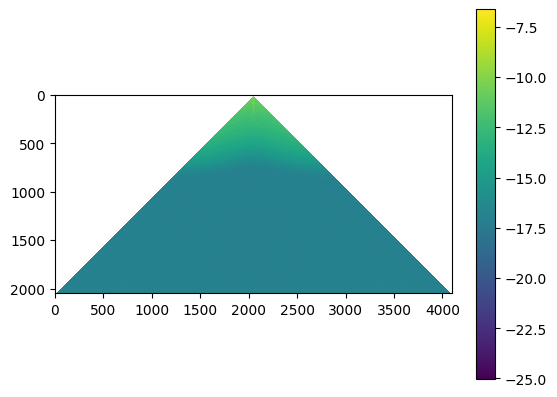

In [22]:
plt.imshow(np.log(abs(f)))
plt.colorbar()


In [4]:
# Step 7 store the reconstructed map
reconstructed_map = np.array(f_check)
np.save(f"/Users/maxwang/Documents/projects/CMB_plot/convolution/30/reconstructed_map", reconstructed_map)  # Save numpy array to a file
load_map = np.load("/Users/maxwang/Documents/projects/CMB_plot/convolution/30/reconstructed_map.npy")
# print(np.nanmean(np.abs(load_map-f)))

In [5]:
print(f"Mean absolute error = {np.nanmean(np.abs(f_check - f))}")

Mean absolute error = 1.8872648461375483e-07


In [89]:
# is_real = np.isreal(f)
# print(is_real.all()) 
#  setting reality=True in the context of spherical harmonic analysis indicates that the input data is real-valued, and the function leverages the conjugate symmetry property of the harmonic coefficients to optimize storage and computation.

False
